In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [2]:
# Read in the data set
df = pd.read_csv('churn_clean.csv')

In [3]:
# Identify and drop any missing values
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID',
                      'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Email', 'Contacts',
                      'City', 'State', 'Marital', 'PaymentMethod', 'PaperlessBilling'])

# Drop any missing values
df = df.dropna()

df["churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
df.drop("Churn", axis = 1, inplace = True)

In [4]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=True)

df = pd.get_dummies(df, columns=['Contract', 'InternetService'])

In [5]:
df.replace(to_replace={'Yes':1, 'No':0}, inplace=True)

In [6]:
df.describe

<bound method NDFrame.describe of       Children  Age    Income  Outage_sec_perweek  Yearly_equip_failure  \
0            0   68  28561.99            7.978323                     1   
1            1   27  21704.77           11.699080                     1   
2            4   50   9609.57           10.752800                     1   
3            1   48  18925.23           14.913540                     0   
4            0   83  40074.19            8.147417                     1   
...        ...  ...       ...                 ...                   ...   
9995         3   23  55723.74            9.415935                     0   
9996         4   48  34129.34            6.740547                     0   
9997         1   48  45983.43            6.590911                     0   
9998         1   39  16667.58           12.071910                     0   
9999         1   28   9020.92           11.754720                     0   

      Techie  Port_modem  Tablet  Phone  Multiple  ...  Item8  ch

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Children                       0
Age                            0
Income                         0
Outage_sec_perweek             0
Yearly_equip_failure           0
Techie                         0
Port_modem                     0
Tablet                         0
Phone                          0
Multiple                       0
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
Tenure                         0
MonthlyCharge                  0
Bandwidth_GB_Year              0
Item1                          0
Item2                          0
Item3                          0
Item4                          0
Item5                          0
Item6                          0
Item7                          0
Item8                          0
churn                          0
Gender_Male                    0
Gender_Nonbinary               0
Contract_M

In [8]:
# Compute the Z-scores of all columns in the dataframe
z_scores = df.apply(zscore)
# Set a threshold for the Z-scores
threshold = 3

In [9]:
print("First 10 rows of Z-scores DataFrame:")
print(z_scores.head(10))

First 10 rows of Z-scores DataFrame:
   Children       Age    Income  Outage_sec_perweek  Yearly_equip_failure  \
0 -0.972338  0.720925 -0.398778           -0.679978              0.946658   
1 -0.506592 -1.259957 -0.641954            0.570331              0.946658   
2  0.890646 -0.148730 -1.070885            0.252347              0.946658   
3 -0.506592 -0.245359 -0.740525            1.650506             -0.625864   
4 -0.972338  1.445638  0.009478           -0.623156              0.946658   
5  0.424900  1.445638 -0.608072           -0.531225              0.946658   
6 -0.972338  1.252381 -1.004997            0.396817              0.946658   
7 -0.040846 -1.115015 -0.462694           -0.742712             -0.625864   
8 -0.040846 -0.197045  0.667680           -1.432469              4.091701   
9 -0.506592  1.590581  0.369682           -0.434839             -0.625864   

     Techie  Port_modem    Tablet     Phone  Multiple  ...     Item8  \
0 -0.449198    1.033770  1.530805  0.320781

In [10]:
# Identify rows with Z-scores above the threshold
outliers = np.where(np.abs(z_scores) > threshold)

In [11]:
# Get the indices of the rows with outliers
outlier_indices = list(set(outliers[0]))

In [12]:
print("Indices of rows with outliers:")
print(outlier_indices)

Indices of rows with outliers:
[8194, 4, 7, 8, 10, 8205, 14, 8208, 8211, 20, 30, 8223, 8225, 8231, 8234, 46, 8241, 8242, 8244, 8254, 8257, 67, 8260, 70, 8265, 76, 8268, 8277, 8281, 91, 97, 100, 104, 107, 108, 8311, 8313, 8317, 8318, 127, 130, 137, 138, 8329, 144, 146, 147, 8348, 8353, 170, 171, 8366, 8369, 179, 8371, 181, 8372, 8375, 186, 8382, 8384, 8389, 202, 210, 214, 8410, 8412, 221, 8417, 227, 239, 254, 258, 261, 264, 8457, 268, 8461, 8476, 285, 8484, 8486, 295, 8488, 8490, 8491, 300, 302, 308, 8500, 8512, 322, 8516, 8518, 329, 8522, 8525, 334, 8530, 8533, 8534, 344, 8536, 346, 8539, 348, 8541, 358, 359, 8551, 369, 8563, 8570, 8574, 8581, 393, 8588, 397, 404, 8596, 8598, 8600, 417, 8613, 425, 8620, 8624, 434, 8627, 442, 443, 446, 8640, 449, 450, 8643, 8644, 8647, 8649, 8653, 466, 8658, 470, 8664, 474, 8666, 8669, 8670, 479, 480, 487, 490, 8687, 8694, 504, 8698, 8702, 511, 513, 527, 8721, 8723, 533, 8729, 542, 8735, 8736, 8738, 550, 8744, 554, 8748, 559, 560, 8751, 564, 8764, 573, 

In [13]:
# Drop the rows with outliers
df = df.drop(df.index[outlier_indices])

In [14]:
print("First 10 rows of the updated dataframe:")
print(df.head(10))

First 10 rows of the updated dataframe:
    Children  Age     Income  Outage_sec_perweek  Yearly_equip_failure  \
0          0   68   28561.99            7.978323                     1   
1          1   27   21704.77           11.699080                     1   
2          4   50    9609.57           10.752800                     1   
3          1   48   18925.23           14.913540                     0   
5          3   83   22660.20            8.420993                     1   
6          0   79   11467.50           11.182725                     1   
9          1   86   50231.40            8.707824                     0   
11         2   56   18342.12            6.680826                     1   
12         0   83   83671.08            8.273875                     0   
13         5   29  115114.57            5.880566                     0   

    Techie  Port_modem  Tablet  Phone  Multiple  ...  Item8  churn  \
0        0           1       1      1         0  ...      4      0   
1    

In [15]:
# Split the data into training and test data sets and provide the file(s).
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.to_csv('traind209p1.csv', index=False)
test.to_csv('test209p1.csv', index=False)

In [16]:
# Split the data into training and test sets
X = df.drop(['churn'], axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [18]:
# Predict using the test set
y_pred = nb.predict(X_test)

In [19]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7799642218246869


In [20]:
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

AUC: 0.817020963603252


Accuracy:  0.7799642218246869
AUC: 0.817020963603252


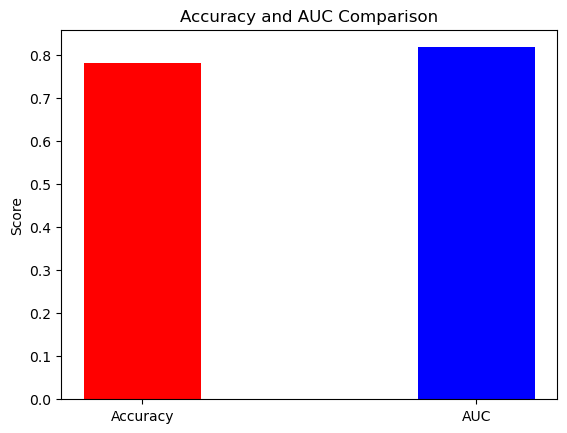

In [21]:
# Evaluate the model's accuracy and AUC
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("AUC:", auc)

# Plot the accuracy and AUC
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(1, accuracy, width, color='red')
rects2 = ax.bar(2, auc, width, color='blue')
ax.set_ylabel('Score')
ax.set_title('Accuracy and AUC Comparison')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Accuracy', 'AUC'])
plt.show()

In [22]:
df.to_csv("D209p1_clean.csv", index=False)